In [28]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,21,22,23,24,25,26,27,30,31,32,33,34,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#2. Get the file
downloaded = drive.CreateFile({'id':'1ytb-fcbDtFxL3Bkr_Ge7ycqqaS10s_yh'}) # replace the id with id of file you want to access
downloaded.GetContentFile('xyz.csv')  

#3. Read file as panda dataframe
import pandas as pd
xyz = pd.read_csv('xyz.csv') 

In [2]:
data = pd.read_csv('final_csv_tab_xlsx_yaml_xml_json.csv')

/Users/erzenavampilova/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,21,22,23,24,25,26,27,30,31,32,33,34,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#https://drive.google.com/file/d/1ytb-fcbDtFxL3Bkr_Ge7ycqqaS10s_yh/view?usp=sharing

In [4]:
data.shape

(3084274, 39)

In [5]:
data = data.drop('Unnamed: 0', 1)

In [6]:
data = data[['Last__Name', 'First__Name','PassengerMiddleName', 'BirthDate', 'Passenger_Sex', 'FamilyStatus', ''
      'PassengerDocument', 'TravelDoc', 'TicketNumber', 'NumberFlight', 'BookingCode', 'TravelClass', 'Fare',
      'DepartDate', 'DepartureTime', 'DepartureCountry', 'DepartureCity', 'AirportDeparture',
      'ArrivalDate', 'ArrivalTime', 'ArrivalCountry', 'CityArrival', 'ArrivalAirport',
      'uid', 'bonusprogramm', 'NickName', 'Status', 'ProgrammNumber',
      'Meal', 'Baggage_right', 'Baggage_left', 'Codeshare_not', 'CodeShare_tc', 'CodeShare_xl', 'Codeshare_json', 'Sequence', 
      'activity_type', 'CardsType',
       ]]

'Last__Name' - фамилия 

'First__Name' - имя 

'PassengerMiddleName' - отчество 

'BirthDate' - дата рождения

'Passenger_Sex' - пол 

'FamilyStatus' - статус (замужем, не замужем) 

'PassengerDocument' - паспорт 
 
'TravelDoc' - паспорт       

  так как по данным была такая ситуация, что у одного человека при регистрации два разных паспорта указаны, поэтому оставляем две колонки)

'TicketNumber' - номер билета

'NumberFlight' - номер рейса

'BookingCode' - код бронирования 

'TravelClass'- класс обслуживания (эконом, бизнес)

'Fare' - тариф

'DepartDate' - дата отправления

'DepartureTime' - время отправления 

'DepartureCountry' - страна отправления

'DepartureCity' - город отправления

'AirportDeparture' - аэропорт отправления 

'ArrivalDate' - дата прибытия 

'ArrivalTime' - время прибытия 

'ArrivalCountry' - страна прибытия

'CityArrival' - город прибытия

'ArrivalAirport' - аэропорт прибытия

'uid' - какой-то id в программах лояльности вроде, уже хз

'bonusprogramm' - программа бонусов от какой компании

'NickName' - это с форумов ник частолетающего человека

'Status' - статус программы лояльности (базовый, элитный)

'ProgrammNumber' - номер программы лояльности

'Meal' - тип еды

'Baggage_right' - какая-то информация о багаже

'Baggage_left' - какая-то информация о багаже

'Codeshare_not' - хз особо что это, надо почитать

'CodeShare_tc' - хз особо что это, надо почитать 

'CodeShare_xl' - хз особо что это, надо почитать 

'Codeshare_json' - хз особо что это, надо почитать

  Эти codeshare много в каких данных были, так что может это что-то важное

'Sequence' - вообще хз

'activity_type' - тип активности (ну априори у нас полет, может там еще какие-то варианты есть)

'CardsType - какая авиакомпания, видимо

In [211]:
data['BirthDate'] = pd.to_datetime(data['BirthDate'])
data['DepartDate'] = pd.to_datetime(data['DepartDate'])
data['ArrivalDate'] = pd.to_datetime(data['ArrivalDate'])
data

,Last__Name,First__Name,PassengerMiddleName,BirthDate,Passenger_Sex,FamilyStatus,PassengerDocument,TravelDoc,TicketNumber,NumberFlight,...,Meal,Baggage_right,Baggage_left,Codeshare_not,CodeShare_tc,CodeShare_xl,Codeshare_json,Sequence,activity_type,CardsType
0,NIKOLSKII,NIKOLAY,IGOREVICH,1990-12-26,Male,MR,4396 926588,4396 926588,6.24742e+15,SU1180,...,,,Transit,NO,Own,Operated by Some Other Airline,False,89.0,Flight,Airlines
1,RUMIANTSEV,EGOR,EVGENEVICH,1972-04-01,Male,MR,7536 277407,7536 277407,9.76449e+15,SU1217,...,,2PC,Registered,NO,Own,Operated by Some Other Airline,False,2.0,NaN,NaN
2,CHERNIAEV,DENIS,ARTEMICH,1993-10-25,Male,MR,6793 521613,6793 521613,9.07825e+15,SU1461,...,NLML,,Transit,NO,Own,Operated by Some Other Airline,False,45.0,Flight,Airlines
3,KOLTSOV,ARTUR,FILIPPOVICH,1976-12-15,Male,MR,0383 434647,0383 434647,9.8277e+14,SU1392,...,HNML,1PC,Delayed,NO,Own,Operated by Some Other Airline,False,97.0,NaN,NaN
4,LUKIN,RAMIL,ADELEVICH,2000-05-12,Male,MR,4816 776333,89 4502970,9.62608e+15,SU1204,...,,,Registered,NO,Own,Operated by Some Other Airline,False,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084269,KUZNETSOVA,AMINA,I.,1978-03-17,Female,NaN,9815 124901,NaN,Not presented,SU1181,...,NaN,NaN,Delayed,NaN,Own,NaN,NaN,NaN,NaN,NaN
3084270,EMELIANOV,MIROSLAV,S.,1976-04-20,Male,NaN,3511 319326,NaN,Not presented,SU1181,...,NaN,NaN,Delayed,NaN,Own,NaN,NaN,NaN,NaN,NaN
3084271,TARASOV,ARTEMII,GERMANOVICH,1990-11-28,Male,NaN,2199 078129,NaN,Not presented,SU1181,...,NaN,NaN,None,NaN,Own,NaN,NaN,NaN,NaN,NaN
3084272,KALMYKOVA,SOFIA,VALEREVNA,1972-12-17,Female,NaN,6618 352713,NaN,Not presented,SU5614,...,NaN,NaN,Registered,NaN,Own,NaN,NaN,NaN,NaN,NaN


### 1. Группа людей (не семья/ разные фамилии) часто летают вместе

In [21]:
df = data.copy()

In [24]:
df['FlightNumber_by_date'] = df['NumberFlight'] + ' ' + df['DepartDate'] + ' ' + df['DepartureTime']

In [26]:
# оставляем мужчин
df = df[df['Passenger_Sex'] == 'Male']
df.head()

,Last__Name,First__Name,PassengerMiddleName,BirthDate,Passenger_Sex,FamilyStatus,PassengerDocument,TravelDoc,TicketNumber,NumberFlight,...,Baggage_right,Baggage_left,Codeshare_not,CodeShare_tc,CodeShare_xl,Codeshare_json,Sequence,activity_type,CardsType,FlightNumber_by_date
0,NIKOLSKII,NIKOLAY,IGOREVICH,1990-12-26 00:00:00,Male,MR,4396 926588,4396 926588,6.24742e+15,SU1180,...,,Transit,NO,Own,Operated by Some Other Airline,False,89.0,Flight,Airlines,SU1180 2017-03-18 22:10
1,RUMIANTSEV,EGOR,EVGENEVICH,1972-04-01 00:00:00,Male,MR,7536 277407,7536 277407,9.76449e+15,SU1217,...,2PC,Registered,NO,Own,Operated by Some Other Airline,False,2.0,NaN,NaN,SU1217 2017-01-08 06:05
2,CHERNIAEV,DENIS,ARTEMICH,1993-10-25 00:00:00,Male,MR,6793 521613,6793 521613,9.07825e+15,SU1461,...,,Transit,NO,Own,Operated by Some Other Airline,False,45.0,Flight,Airlines,SU1461 2017-01-10 18:30
3,KOLTSOV,ARTUR,FILIPPOVICH,1976-12-15 00:00:00,Male,MR,0383 434647,0383 434647,9.8277e+14,SU1392,...,1PC,Delayed,NO,Own,Operated by Some Other Airline,False,97.0,NaN,NaN,SU1392 2017-02-27 11:50
4,LUKIN,RAMIL,ADELEVICH,2000-05-12 00:00:00,Male,MR,4816 776333,89 4502970,9.62608e+15,SU1204,...,,Registered,NO,Own,Operated by Some Other Airline,False,2.0,NaN,NaN,SU1204 2017-02-27 17:00


In [30]:
# Создаем список полетов для каждого пассажира

passenger_flights = {}

print(len(df))

for index, row in tqdm(df[['PassengerDocument', 'FlightNumber_by_date']].iterrows()):
    document = row['PassengerDocument']
    flight_number = row['FlightNumber_by_date']
    
    if not document in passenger_flights:
        passenger_flights[document] = []
    passenger_flights[document].append(flight_number)
        
passenger_flights

323it [00:00, 3212.75it/s]

738866


738866it [10:11:20, 20.14it/s]   


{'4396 926588': ['SU1180 2017-03-18 22:10',
  'SU5617 2017-07-03 09:45',
  'SU1142 2017-03-04 13:45',
  'SU6286 2017-07-27 16:30',
  'SU1246 2017-04-22 06:00',
  'SU5616 2017-07-12 03:00',
  'SU6285 2017-06-19 19:25'],
 '7536 277407': ['SU1217 2017-01-08 06:05'],
 '6793 521613': ['SU1461 2017-01-10 18:30',
  'SU1409 2017-12-28 05:05',
  'SU1390 2018-01-01 07:45'],
 '0383 434647': ['SU1392 2017-02-27 11:50',
  'SU1713 2017-02-13 14:40',
  'SU1205 2017-03-16 23:05'],
 '4816 776333': ['SU1204 2017-02-27 17:00'],
 '1008 391723': ['SU1205 2017-01-04 23:05'],
 '6785 928243': ['SU1285 2017-08-05 09:50',
  'SU1218 2017-12-13 00:30',
  'SU1351 2017-03-17 11:10',
  'SU1205 2017-12-26 23:05'],
 '8234 693330': ['SU1451 2017-02-12 06:55',
  'SU1456 2017-01-17 10:25',
  'SU1435 2017-01-05 13:15',
  'SU1441 2017-02-28 05:40'],
 '6164 103050': ['SU5611 2017-01-26 08:00', 'SU1520 2017-11-25 09:40'],
 '7627 582335': ['SU1173 2017-04-18 06:00', 'SU1172 2017-04-15 21:25'],
 '6131 479723': ['SU1383 2017-05

In [41]:
# Вычисляем пассажиров, у которых больше двух полетов

passenger_flights_more_one = {}

for key, value in tqdm(passenger_flights.items()):
    if len(value) > 2:
        passenger_flights_more_one[key] = value
        
print(len(passenger_flights_more_one))

100%|██████████| 690729/690729 [00:00<00:00, 1666596.14it/s]

10781


In [48]:
# Находим пассажиров, которые летали вместе

result_list = []

for doc, number in tqdm(passenger_flights_more_one.items()):
    if pd.notna(doc):
        for doc1, number1 in passenger_flights_more_one.items():
            if pd.notna(doc1):
                if doc != doc1:
                    intersect = set(number).intersection(set(number1))
                    if len(intersect) > 1:
                        first = str(df[df['PassengerDocument'] == doc]['Last__Name'].unique())
                        second = str(df[df['PassengerDocument'] == doc1]['Last__Name'].unique())
                        if first.strip()[:7] != second.strip()[:7]:
                            result_list.append([first, doc, second, doc1, intersect])

100%|██████████| 10781/10781 [04:15<00:00, 42.15it/s]


In [244]:
for row in result_list:
    row[4] = list(row[4])

[["['BESSONOV']",
  '0576 780505',
  "['SCHUKIN' 'SHCHUKIN']",
  '8322 202038',
  ['SU4605 2017-01-23 14:20', 'SU4606 2017-01-26 12:10']],
 ["['SCHEGLOV' 'SHCHEGLOV']",
  '5188 472138',
  "['FOMICHEV']",
  '4808 932846',
  ['SU4600 2017-01-06 13:05', 'SU4605 2017-02-02 14:20']],
 ["['SCHEGLOV' 'SHCHEGLOV']",
  '3187 024041',
  "['EREMEEV']",
  '4793 807461',
  ['SU4606 2017-02-14 12:10', 'SU4606 2017-03-07 12:10']],
 ["['ROMANOV']",
  '8532 227038',
  "['EZHOV']",
  '7116 771278',
  ['SU1122 2017-02-25 08:10', 'SU1129 2017-03-15 06:20']],
 ["['VORONIN']",
  '4155 103388',
  "['AGEEV']",
  '7521 463824',
  ['SU5621 2017-02-27 08:05', 'SU5622 2017-02-23 19:45']],
 ["['TIHONOV' 'TIKHONOV']",
  '7448 534723',
  "['DAVYDOV']",
  '0288 516264',
  ['SU1534 2017-03-17 14:55', 'SU1427 2017-03-21 22:45']],
 ["['ZORIN']",
  '6591 786220',
  "['PARFENOV']",
  '9078 207166',
  ['SU1763 2017-03-16 05:35', 'SU1640 2017-02-01 07:00']],
 ["['KALMYKOV']",
  '0150 856814',
  "['SUHOV' 'SUKHOV']",
  '5953

In [274]:
for first, doc, second, doc1, intersect in result_list:
    print(first, second)
    print('Passenger document 1: ', doc, ' Passenger document 2:', doc1)
    print('Intersection flight:', intersect)
    print('_' * 35)

['BESSONOV'] ['SCHUKIN' 'SHCHUKIN']
Passenger document 1:  0576 780505  Passenger document 2: 8322 202038
Intersection flight: ['SU4605 2017-01-23 14:20', 'SU4606 2017-01-26 12:10']
___________________________________
['SCHEGLOV' 'SHCHEGLOV'] ['FOMICHEV']
Passenger document 1:  5188 472138  Passenger document 2: 4808 932846
Intersection flight: ['SU4600 2017-01-06 13:05', 'SU4605 2017-02-02 14:20']
___________________________________
['SCHEGLOV' 'SHCHEGLOV'] ['EREMEEV']
Passenger document 1:  3187 024041  Passenger document 2: 4793 807461
Intersection flight: ['SU4606 2017-02-14 12:10', 'SU4606 2017-03-07 12:10']
___________________________________
['ROMANOV'] ['EZHOV']
Passenger document 1:  8532 227038  Passenger document 2: 7116 771278
Intersection flight: ['SU1122 2017-02-25 08:10', 'SU1129 2017-03-15 06:20']
___________________________________
['VORONIN'] ['AGEEV']
Passenger document 1:  4155 103388  Passenger document 2: 7521 463824
Intersection flight: ['SU5621 2017-02-27 08:05'

In [245]:
print('Итого пар мужчин, которые летали вместе больше 1 раза: ', len(result_list))

Итого пар мужчин, которые летали вместе больше 1 раза:  98


In [280]:
# Список этих мужчин

all_documents = set([])
numbers = set([])
for row in result_list:
    all_documents.add(row[1])
    all_documents.add(row[3])
    numbers.add(row[4][0])
    numbers.add(row[4][1])
    
strange_couples = df[df['PassengerDocument'].isin(all_documents)]
strange_couples = strange_couples[strange_couples['FlightNumber_by_date'].isin(numbers)]
strange_couples = strange_couples[[
    'Last__Name', 'First__Name', 'BirthDate', 'PassengerDocument', 
#     'NumberFlight', 'DepartDate', 'DepartureTime','CityArrival'
]]
strange_couples['BirthDate'] = pd.to_datetime(strange_couples['BirthDate'])

In [281]:
strange_couples = strange_couples.drop_duplicates(keep='first')
strange_couples.reset_index(drop=True)

,Last__Name,First__Name,BirthDate,PassengerDocument
0,BESSONOV,PLATON,1979-02-07,0576 780505
1,ROMANOV,IAROSLAV,1995-11-18,8532 227038
2,VORONIN,ROMAN,1989-09-10,4155 103388
3,TIHONOV,GLEB,1985-11-18,7448 534723
4,KALMYKOV,ARTUR,1977-10-28,0150 856814
...,...,...,...,...
105,FOMICHEV,ADEL,1992-03-19,4808 932846
106,GORDEEV,VITALII,1993-12-21,0037 237975
107,MESHCHERIAKOV,ARTUR,1993-04-06,1936 858977
108,ZOLOTOV,IVAN,1983-05-21,7406 652084


### 2. Питание

In [334]:
df_hypo2 = data.copy()

- LSML - Питание с низким содержанием соли
- FPML - Фруктовое питание
- VGML – Блюда для веганов.
- NLML – Пища с низким содержанием лактозы. 
- DBML - Диабетическое питание
- VLML - Вегетарианское с использованием молока и яиц
- ORML – Oriental Meal – не диетическое/религиозное питание, а просто восточная кухня, шашлык-машлык.
- HNML - Индуистское невeгетарианское (Хинду)
- MOML - Мусульманское
- KSML - Кошерное
- RVML - Сырые овощи и фрукты

In [294]:
# ORML – Oriental Meal – не диетическое/религиозное питание, а просто восточная кухня, шашлык-машлык.
# HNML - Индуистское невeгетарианское (Хинду)
# MOML - Мусульманское
# KSML - Кошерное

li=['ORML', 'HNML', 'MOML', 'KSML']  
meals_df = df_hypo2[df_hypo2.Meal.isin(li)]

In [295]:
meals_df['PassengerDocument'] = meals_df['PassengerDocument'].combine_first(meals_df['TravelDoc'])
meals_df = meals_df[['Last__Name', 'First__Name', 'BirthDate', 'PassengerDocument', 'Meal']]

<ipython-input-295-ab91ac6e8caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meals_df['PassengerDocument'] = meals_df['PassengerDocument'].combine_first(meals_df['TravelDoc'])


In [298]:
meals_df = meals_df.drop_duplicates(keep='first')
meals_df.reset_index(drop=True)

,Last__Name,First__Name,BirthDate,PassengerDocument,Meal
0,KOLTSOV,ARTUR,1976-12-15,0383 434647,HNML
1,SOTNIKOV,ODISSEI,1988-01-05,8234 693330,HNML
2,KOSELEV,DMITRIY,1979-05-10,7881 877762,ORML
3,SAHAROVA,INNA,1984-11-15,7816 147341,KSML
4,DANILOVA,MILANA,1985-07-26,3763 776092,ORML
...,...,...,...,...,...
18956,FEDOSEEVA,NELLI,NaT,6653 545581,ORML
18957,ULIANOVA,AMALIIA,1994-10-26,7797 005379,KSML
18958,ANDRIANOVA,REGINA,NaT,8357 209426,ORML
18959,SCHUKIN,EGOR,NaT,6464 699484,MOML


### 3. Мало информации

> Отсутствуют паспортные данные

In [442]:
сonf = df_hypo2[df_hypo2['PassengerDocument'].combine_first(df_hypo2['TravelDoc']).isnull()]
сonf

,Last__Name,First__Name,PassengerMiddleName,BirthDate,Passenger_Sex,FamilyStatus,PassengerDocument,TravelDoc,TicketNumber,NumberFlight,...,Meal,Baggage_right,Baggage_left,Codeshare_not,CodeShare_tc,CodeShare_xl,Codeshare_json,Sequence,activity_type,CardsType
12924,ERMOLAEVA,AGATA,NaN,NaT,Female,MRS,NaN,NaN,8.47602e+14,SU6234,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,63.0,NaN,NaN
12925,GOLOVINA,NIKA,NaN,NaT,Female,MRS,NaN,NaN,9.23696e+15,SU4033,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,True,86.0,Flight,Airlines
12926,VORONOV,KIRILL,NaN,NaT,NaN,MR,NaN,NaN,7.04998e+15,SU6542,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,62.0,Flight,Airlines
12927,BELKINA,ALBINA,NaN,NaT,NaN,MRS,NaN,NaN,8.18936e+15,KE5984,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,True,36.0,NaN,NaN
12928,BOGOMOLOVA,OLESIA,NaN,NaT,NaN,MRS,NaN,NaN,6.78914e+14,SU6462,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,94.0,Flight,Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873048,GUSEVA,MAR'YANA,NaN,NaT,NaN,MRS,NaN,NaN,1.72429e+15,SV1421,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,63.0,NaN,NaN
2873049,KORNILOV,VLADIMIR,NaN,NaT,NaN,MR,NaN,NaN,8.67398e+15,AZ7240,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,54.0,NaN,NaN
2873050,SHESTAKOVA,NELLI,NaN,NaT,NaN,MRS,NaN,NaN,6.05745e+15,DL1161,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,9.0,NaN,NaN
2873051,IGNATOVA,ALINA,NaN,NaT,NaN,MRS,NaN,NaN,3.82547e+15,GA312,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,49.0,NaN,NaN


> Отсутсвует фамилия

In [443]:
сonf = сonf[сonf['Last__Name'].isnull()]
сonf

,Last__Name,First__Name,PassengerMiddleName,BirthDate,Passenger_Sex,FamilyStatus,PassengerDocument,TravelDoc,TicketNumber,NumberFlight,...,Meal,Baggage_right,Baggage_left,Codeshare_not,CodeShare_tc,CodeShare_xl,Codeshare_json,Sequence,activity_type,CardsType
12965,NaN,NaN,NaN,NaT,NaN,MR,NaN,NaN,6.63834e+15,SU5618,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,77.0,NaN,NaN
12993,NaN,NaN,NaN,NaT,Female,MRS,NaN,NaN,9.63895e+15,SU2386,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,58.0,NaN,NaN
13090,NaN,NaN,NaN,NaT,Male,MR,NaN,NaN,6.06885e+15,SU6314,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,31.0,NaN,NaN
13114,NaN,NaN,NaN,NaT,Female,MRS,NaN,NaN,8.15116e+14,VN64,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,21.0,NaN,NaN
13376,NaN,NaN,NaN,NaT,Male,MR,NaN,NaN,1.89773e+15,SU1402,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,62.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872959,NaN,NaN,NaN,NaT,NaN,MRS,NaN,NaN,6.90337e+15,MU2967,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,5.0,NaN,NaN
2872969,NaN,NaN,NaN,NaT,NaN,MR,NaN,NaN,3.92165e+15,VN1601,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,32.0,NaN,NaN
2872974,NaN,NaN,NaN,NaT,NaN,MR,NaN,NaN,2.01793e+14,SV599,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,89.0,NaN,NaN
2872997,NaN,NaN,NaN,NaT,NaN,MRS,NaN,NaN,7.2418e+15,MU6741,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,6.0,NaN,NaN


> Отсутсвует день рождения

In [445]:
сonf= сonf[сonf['BirthDate'].isnull()]
сonf

,Last__Name,First__Name,PassengerMiddleName,BirthDate,Passenger_Sex,FamilyStatus,PassengerDocument,TravelDoc,TicketNumber,NumberFlight,...,Meal,Baggage_right,Baggage_left,Codeshare_not,CodeShare_tc,CodeShare_xl,Codeshare_json,Sequence,activity_type,CardsType
12965,NaN,NaN,NaN,NaT,NaN,MR,NaN,NaN,6.63834e+15,SU5618,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,77.0,NaN,NaN
12993,NaN,NaN,NaN,NaT,Female,MRS,NaN,NaN,9.63895e+15,SU2386,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,58.0,NaN,NaN
13090,NaN,NaN,NaN,NaT,Male,MR,NaN,NaN,6.06885e+15,SU6314,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,31.0,NaN,NaN
13114,NaN,NaN,NaN,NaT,Female,MRS,NaN,NaN,8.15116e+14,VN64,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,21.0,NaN,NaN
13376,NaN,NaN,NaN,NaT,Male,MR,NaN,NaN,1.89773e+15,SU1402,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,False,62.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872959,NaN,NaN,NaN,NaT,NaN,MRS,NaN,NaN,6.90337e+15,MU2967,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,5.0,NaN,NaN
2872969,NaN,NaN,NaN,NaT,NaN,MR,NaN,NaN,3.92165e+15,VN1601,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,32.0,NaN,NaN
2872974,NaN,NaN,NaN,NaT,NaN,MR,NaN,NaN,2.01793e+14,SV599,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,89.0,NaN,NaN
2872997,NaN,NaN,NaN,NaT,NaN,MRS,NaN,NaN,7.2418e+15,MU6741,...,NaN,NaN,NaN,NaN,NaN,Operated by Some Other Airline,NaN,6.0,NaN,NaN


> Отсутсвует номер билета

In [446]:
сonf = сonf[сonf['TicketNumber'].isnull()]
сonf

,Last__Name,First__Name,PassengerMiddleName,BirthDate,Passenger_Sex,FamilyStatus,PassengerDocument,TravelDoc,TicketNumber,NumberFlight,...,Meal,Baggage_right,Baggage_left,Codeshare_not,CodeShare_tc,CodeShare_xl,Codeshare_json,Sequence,activity_type,CardsType
131041,NaN,NaN,NaN,NaT,Female,NaN,NaN,NaN,NaN,AF1145,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
131042,NaN,NaN,NaN,NaT,Female,NaN,NaN,NaN,NaN,AF1844,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
131044,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,AF4901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131045,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,AZ545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131047,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,AZ7163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388318,NaN,NaN,NaN,NaT,Male,NaN,NaN,NaN,NaN,SU1185,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2388319,NaN,NaN,NaN,NaT,Male,NaN,NaN,NaN,NaN,SU1185,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2388320,NaN,NaN,NaN,NaT,Male,NaN,NaN,NaN,NaN,SU2033,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2388321,NaN,NaN,NaN,NaT,Male,NaN,NaN,NaN,NaN,SU2033,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [449]:
сonf = сonf[['Last__Name', 'First__Name', 'PassengerMiddleName','BirthDate', 'PassengerDocument', 
             'NumberFlight', 'DepartDate', 'DepartureTime','CityArrival'
]]
сonf = сonf.drop_duplicates(keep='first')
сonf.reset_index(drop=True)

,Last__Name,First__Name,PassengerMiddleName,BirthDate,PassengerDocument,NumberFlight,DepartDate,DepartureTime,CityArrival
0,NaN,NaN,NaN,NaT,NaN,AF1145,2017-01-01,NaN,Paris
1,NaN,NaN,NaN,NaT,NaN,AF1844,2017-01-01,NaN,Paris
2,NaN,NaN,NaN,NaT,NaN,AF4901,2017-01-01,NaN,NaN
3,NaN,NaN,NaN,NaT,NaN,AZ545,2017-01-01,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,AZ7163,2017-01-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...
828121,NaN,NaN,NaN,NaT,NaN,AZ597,2017-08-22,NaN,Rome
828122,NaN,NaN,NaN,NaT,NaN,MF887,2017-08-08,NaN,Taipei
828123,NaN,NaN,NaN,NaT,NaN,OK792,2017-05-04,NaN,Budapest
828124,NaN,NaN,NaN,NaT,NaN,SU6619,2017-03-04,NaN,London


### 4. Аномалии по возрасту

In [218]:
df_hypo2[df_hypo2['BirthDate'] < '1930-12-31']

,Last__Name,First__Name,PassengerMiddleName,BirthDate,Passenger_Sex,FamilyStatus,PassengerDocument,TravelDoc,TicketNumber,NumberFlight,...,Meal,Baggage_right,Baggage_left,Codeshare_not,CodeShare_tc,CodeShare_xl,Codeshare_json,Sequence,activity_type,CardsType


Аномалий не найдено

In [220]:
# Дата рождения самого "старого" пассажира
df_hypo2['BirthDate'].min()

Timestamp('1970-01-02 00:00:00')

In [239]:
# Дата рождения самого молодого пассажира
df_hypo2['BirthDate'].max()

Timestamp('2000-12-30 00:00:00')

In [404]:
bdate = df_hypo2.copy()

In [405]:
bdate['BirthDate'] = bdate['BirthDate'].dt.year

In [426]:
res = bdate['BirthDate'].value_counts()
res.to_csv('date_res.csv')

In [400]:
# bdate['BirthDate'] = bdate['BirthDate'].values.astype(np.int64)

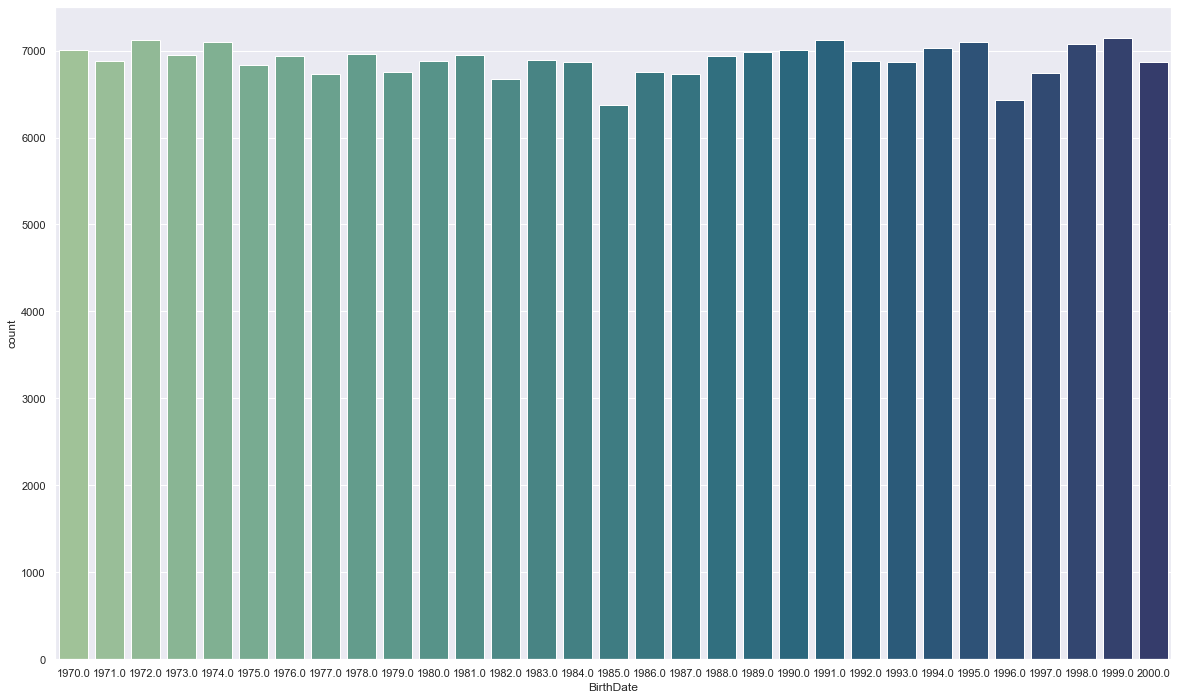

In [422]:
# bdate['BirthDate'].value_counts().plot.bar()
from matplotlib import pyplot
import seaborn as sns
a4_dims = (20, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="BirthDate", data=bdate, palette="crest")

### 5. Распространненые фамилии и имена

In [326]:
# https://www.adme.ru/svoboda-puteshestviya/my-sostavili-spisok-samyh-rasprostranennyh-familij-na-zemle-i-neslabo-udivilis-1732915/
commonLastName=['Smith', 'Johnson', 'Ivanov','Ivanova', 'Smirnov', 'Smirnova', 'Li', 'Wang', 'Kim', 'Muller',
                'Schmidt', 'Suzuki', 'Sato', 'Silva', 'Santos', 'Dlamini', 'Ntuli', 'Devi', 'Singh',
                'Anderson', 'Johansson', 'Rossi', 'Russo', 'Novak', 'Covalski', 'Nguyen', 'Chan'] 
commonFirstName=['James', 'Emma', 'Aleksandr','Alexandr','Alexandre','Aleksandre', 'Anastasia', 'Wei', 'Fung', 'Ben', 'Minato', 'Sakura',
                'Migel', 'Alicia', 'Sato', 'Silva', 'Junior', 'Imanati', 'Arav', 'Adiya', 'Karl', 'Maria',
                 'Francesco', 'Sofia', 'Mateusz', 'Aleksandra', 'Duc', 'Ho'] 
commonLastNameUp = list(map(str.upper, commonLastName))
commonFirstNameUp = list(map(str.upper, commonFirstName))

In [327]:
commonLastName_df = df_hypo2[df_hypo2.Last__Name.isin(commonLastNameUp)]

In [328]:
commonNames_df = commonLastName_df[commonLastName_df.First__Name.isin(commonFirstNameUp)]
commonNames_df['PassengerDocument'] = commonNames_df['PassengerDocument'].combine_first(commonNames_df['TravelDoc'])
commonNames_df = commonNames_df[[
    'Last__Name', 'First__Name', 'PassengerMiddleName','BirthDate',  'PassengerDocument', 
#     'NumberFlight', 'DepartDate', 'DepartureTime','CityArrival'
]]
commonNames_df = commonNames_df.drop_duplicates(keep='first')
commonNames_df.reset_index(drop=True)

<ipython-input-328-8528fb7b01b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commonNames_df['PassengerDocument'] = commonNames_df['PassengerDocument'].combine_first(commonNames_df['TravelDoc'])


,Last__Name,First__Name,PassengerMiddleName,BirthDate,PassengerDocument
0,SMIRNOVA,ALEKSANDRA,MIRONOVNA,1971-05-13,5616 823049
1,SMIRNOVA,ALEKSANDRA,NaN,NaT,NaN
2,IVANOV,ALEKSANDR,NaN,NaT,NaN
3,SMIRNOVA,SOFIA,NaN,NaT,NaN
4,SMIRNOVA,SOFIA,GORDEEVNA,1976-09-22,2938 135082
5,IVANOV,ALEXANDR,NaN,NaT,NaN
6,IVANOV,ALEKSANDR,FILIPPOVICH,1970-09-06,6160 546663
7,IVANOVA,SOFIA,GORDEEVNA,1974-12-08,0931 422529
8,IVANOVA,SOFIA,GORDEEVNA,NaT,0931 422529
9,SMIRNOVA,SOFIA,GORDEEVNA,NaT,2938 135082


In [329]:
commonNames_df = commonNames_df.groupby(['Last__Name','First__Name'],as_index=False).first()
commonNames_df

,Last__Name,First__Name,PassengerMiddleName,BirthDate,PassengerDocument
0,IVANOV,ALEKSANDR,FILIPPOVICH,1970-09-06,6160 546663
1,IVANOV,ALEXANDR,NaN,NaT,NaN
2,IVANOVA,SOFIA,GORDEEVNA,1974-12-08,0931 422529
3,SMIRNOVA,ALEKSANDRA,MIRONOVNA,1971-05-13,5616 823049
4,SMIRNOVA,SOFIA,GORDEEVNA,1976-09-22,2938 135082


In [330]:
print('Количество человек с распространнеными фамилией и именами: ', len(commonNames_df))

Количество человек с распространнеными фамилией и именами:  5


### Statistic Info

In [462]:
info_df = df_hypo2.copy()
# info_df = info_df.groupby(['Last__Name','First__Name', 'BirthDate'],as_index=False)

In [465]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084274 entries, 0 to 3084273
Data columns (total 38 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Last__Name           object        
 1   First__Name          object        
 2   PassengerMiddleName  object        
 3   BirthDate            datetime64[ns]
 4   Passenger_Sex        object        
 5   FamilyStatus         object        
 6   PassengerDocument    object        
 7   TravelDoc            object        
 8   TicketNumber         object        
 9   NumberFlight         object        
 10  BookingCode          object        
 11  TravelClass          object        
 12  Fare                 object        
 13  DepartDate           datetime64[ns]
 14  DepartureTime        object        
 15  DepartureCountry     object        
 16  DepartureCity        object        
 17  AirportDeparture     object        
 18  ArrivalDate          datetime64[ns]
 19  ArrivalTime          

In [469]:
info_df['CityArrival'] = info_df['CityArrival'].str.lower()
info_df['CityArrival'].value_counts()
# info_df['CityArrival'].value_counts().to_csv('popularity_arrival.csv')

In [479]:
# info_df[info_df['CityArrival']=='moscow']['ArrivalDate'].dt.month.value_counts()
info_df['ArrivalAirport'].value_counts()
info_df['ArrivalAirport'].value_counts().to_csv('popularity_aeroport.csv')

In [481]:
info_df['DepartDate'].dt.month.value_counts()

1     334217
3     295659
12    273916
8     271580
6     262207
7     259128
2     254170
5     243620
9     235218
4     221227
11    217479
10    215853
Name: DepartDate, dtype: int64

In [482]:
info_df['ArrivalDate'].dt.month.value_counts()

1.0     60963
2.0     27803
3.0     20986
4.0     10638
5.0      8711
6.0      7118
7.0      5200
8.0      4276
9.0      3068
10.0     2419
12.0     2402
11.0     2173
Name: ArrivalDate, dtype: int64

- Y - Economy
- J - Full Fare Business Class
- A - First Class Discounted
- P - First Class

In [487]:
print(info_df['TravelClass'].value_counts())
# info_df['Fare'].value_counts().to_csv('popularity_fare.csv')

Y    1946638
A     236924
J      94340
P      47428
Name: TravelClass, dtype: int64
